In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

## Find Patterns

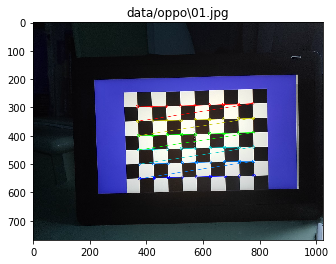

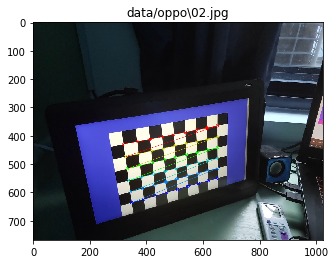

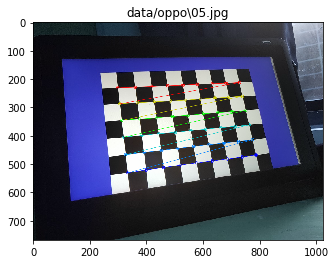

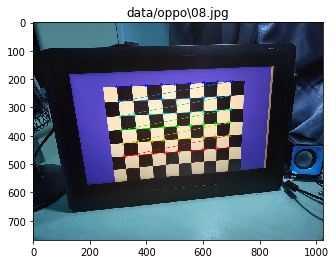

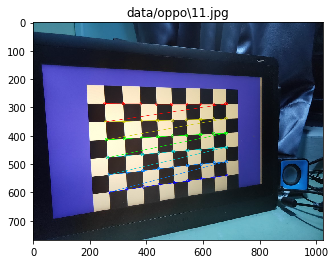

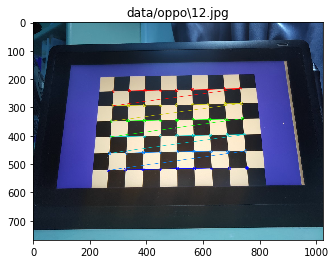

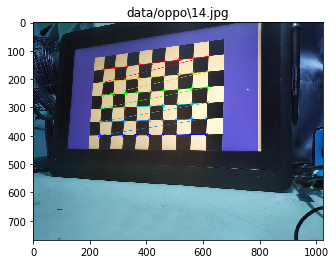

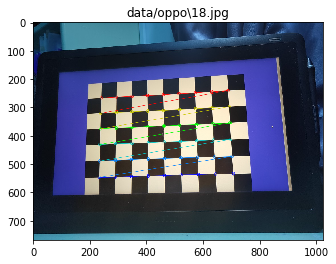

In [2]:
#迭代終止標準
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
#設3D平面的點平穩且平移 (z=0)
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

obj_pts = []
img_pts = []
images = glob.glob('data/oppo/*.jpg')
for f in images:
    img = cv2.imread(f)
    #灰階
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None) 
    #找到pattern的話使用cv2.cornerSubPix()再精化
    if ret:
        obj_pts.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        img_pts.append(corners2)
        tmp = cv2.drawChessboardCorners(img, (9,6), corners2,ret)
        plt.title(f)
        plt.imshow(tmp)
        plt.show()
        

## Calibration

In [3]:
#Finds the camera intrinsic and extrinsic parameters from several views of a calibration pattern.intrinsic 
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_pts, img_pts, gray.shape[::-1],None,None)
print('\n\t\t|Intrinsic parameters|\nCamera Matrix: \n{}'.format(mtx))
print('\n\t\t|Extrinsic parameters| \nrotation_vectors:\n{}\n\ntranslation_vectors: \n{}'.format(rvecs,tvecs))
print('\n\t\tDistortion Coefficients:\n{}'.format(dist))


		|Intrinsic parameters|
Camera Matrix: 
[[825.01245451   0.         513.34495342]
 [  0.         824.91196193 412.36408301]
 [  0.           0.           1.        ]]

		|Extrinsic parameters| 
rotation_vectors:
[array([[ 1.49343377e-03],
       [-4.76350236e-02],
       [ 3.11471857e+00]]), array([[-0.58750392],
       [-0.49621743],
       [ 2.91505472]]), array([[-0.38461683],
       [ 0.33700223],
       [ 2.96473407]]), array([[ 0.29716583],
       [-0.13425298],
       [-0.05592135]]), array([[-0.62225905],
       [-0.11904313],
       [ 3.03360201]]), array([[0.02835376],
       [0.40528435],
       [3.10066865]]), array([[-0.54162767],
       [-0.15691042],
       [-3.07450675]]), array([[0.14480211],
       [0.24047822],
       [3.09547396]])]

translation_vectors: 
[array([[ 5.26925804],
       [ 2.53582594],
       [16.63175093]]), array([[ 3.60257073],
       [ 3.56244415],
       [21.83239862]]), array([[ 4.9092729 ],
       [ 1.00175384],
       [15.06984424]]), array([

## Undistortion

		New Camera Matrix: 
[[872.30462646   0.         513.24054668]
 [  0.         840.34124756 412.56186927]
 [  0.           0.           1.        ]]

	Distortion Coefficients: 
[ 4.13950062e-01 -2.85705284e+00  1.23293635e-03  5.64979181e-04
  6.15886473e+00]

新座標 x,y: 173,149
新圖像大小 寬x高: 683 x 532


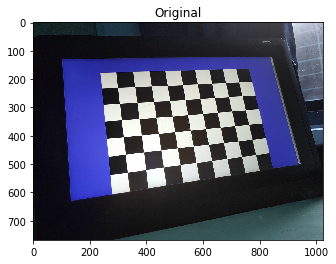

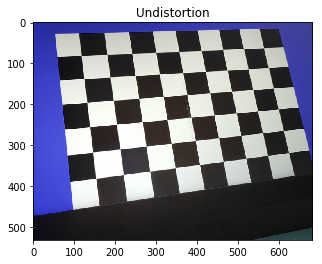

In [4]:
img = cv2.imread('data/oppo/05.jpg')
h,  w = img.shape[:2]
camera_matrix, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
print('\t\tNew Camera Matrix: \n{}\n\n\tDistortion Coefficients: \n{}\n'.format(camera_matrix,*dist))
print('新座標 x,y: {},{}\n新圖像大小 寬x高: {} x {}'.format(*roi))
dst = cv2.undistort(img, mtx, dist, None, camera_matrix)
#裁取
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
plt.title('Original')
plt.imshow(img)
plt.show()
plt.title('Undistortion')
plt.imshow(dst)
plt.show()